In [15]:
import pandas as pd
import numpy as np

results = pd.read_csv('results/lgb_tuning_history.csv')

In [4]:
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)
results.head()

,loss,params,iteration,estimators,train_time
0,0.104044,"{'bagging_fraction': 1.0, 'bagging_freq': 7, '...",363,5001,299.691928
1,0.104132,"{'bagging_fraction': 1.0, 'bagging_freq': 3, '...",600,6633,408.859908
2,0.104158,"{'bagging_fraction': 1.0, 'bagging_freq': 3, '...",441,8854,525.191911
3,0.104170,"{'bagging_fraction': 1.0, 'bagging_freq': 5, '...",402,6468,378.603478
4,0.104171,"{'bagging_fraction': 1.0, 'bagging_freq': 2, '...",602,7625,466.967240


In [5]:
import ast

# Convert from a string to a dictionary
ast.literal_eval(results.loc[0, 'params'])

{'bagging_fraction': 1.0,
 'bagging_freq': 7,
 'bagging_seed': 1337,
 'boost_from_average': False,
 'boosting_type': 'gbdt',
 'data_random_seed': 1337,
 'drop_seed': 1337,
 'feature_fraction': 0.6263024843124217,
 'feature_fraction_seed': 1337,
 'is_unbalance': True,
 'lambda_l1': 0.9568243362944123,
 'lambda_l2': 0.6326387270237837,
 'learning_rate': 0.02868953109889185,
 'max_bin': 120,
 'max_depth': 14,
 'min_child_samples': 470,
 'min_gain_to_split': 0.8966837898584304,
 'min_sum_hessian_in_leaf': 0.003271043250909083,
 'num_leaves': 5,
 'objective': 'binary',
 'save_binary': True,
 'seed': 1337,
 'subsample_for_bin': 140000,
 'subsample': 0.7657044953727186}

In [6]:
# Create a new dataframe for storing parameters
bayes_params = pd.DataFrame(columns = list(ast.literal_eval(results.loc[0, 'params']).keys()),
                            index = list(range(len(results))))

# Add the results with each parameter a different column
for i, params in enumerate(results['params']):
    bayes_params.loc[i, :] = list(ast.literal_eval(params).values())
    
bayes_params['loss'] = results['loss']
bayes_params['iteration'] = results['iteration']

bayes_params.head()

,bagging_fraction,bagging_freq,bagging_seed,boost_from_average,boosting_type,data_random_seed,drop_seed,feature_fraction,feature_fraction_seed,is_unbalance,...,min_gain_to_split,min_sum_hessian_in_leaf,num_leaves,objective,save_binary,seed,subsample_for_bin,subsample,loss,iteration
0,1,7,1337,False,gbdt,1337,1337,0.626302,1337,True,...,0.896684,0.00327104,5,binary,True,1337,140000,0.765704,0.104044,363
1,1,3,1337,False,gbdt,1337,1337,0.654692,1337,True,...,0.781628,0.0200141,5,binary,True,1337,80000,0.768217,0.104132,600
2,1,3,1337,False,gbdt,1337,1337,0.634934,1337,True,...,0.843338,0.00396652,5,binary,True,1337,160000,0.761908,0.104158,441
3,1,5,1337,False,gbdt,1337,1337,0.615081,1337,True,...,0.817856,0.0053388,5,binary,True,1337,160000,0.784664,0.104170,402
4,1,2,1337,False,gbdt,1337,1337,0.656918,1337,True,...,0.735632,0.0263279,5,binary,True,1337,60000,0.71305,0.104171,602


In [16]:
space = {
        "max_depth": 14,
        "save_binary": True,
        "seed": 1337,
        "feature_fraction_seed": 1337,
        "bagging_seed": 1337,
        "drop_seed": 1337,
        "data_random_seed": 1337,
        "objective": "binary",
        "is_unbalance": True,
        "boost_from_average": False,
        "max_bin": 120,
        "min_sum_hessian_in_leaf": hp.loguniform(
            "min_sum_hessian_in_leaf", np.log(0.0001), np.log(0.2)
        ),
        "bagging_fraction": 1.0,
        "bagging_freq": hp.uniform("bagging_freq", 0, 10),
        "min_gain_to_split": hp.uniform(
            "min_gain_to_split", 0.0, 1.0
        ),  # used to control regularization
        "boosting_type": hp.choice(
            "boosting_type",
            [
                {
                    "boosting_type": "gbdt",
                    "subsample": hp.uniform("gdbt_subsample", 0.5, 1),
                }
            ],
        ),
        "num_leaves": hp.quniform("num_leaves", 5, 200, 1),
        "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.2)),
        "subsample_for_bin": hp.quniform("subsample_for_bin", 20000, 300000, 20000),
        "min_child_samples": hp.quniform(
            "min_child_samples", 5, 500, 5
        ),  # min_data_in_leaf
        "lambda_l1": hp.uniform("lambda_l1", 0.0, 10.0),
        "lambda_l2": hp.uniform("lambda_l2", 0.0, 10.0),
        "feature_fraction": hp.uniform("feature_fraction", 0.6, 1.0),
    }

C:\Users\Adam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Adam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Adam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Adam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


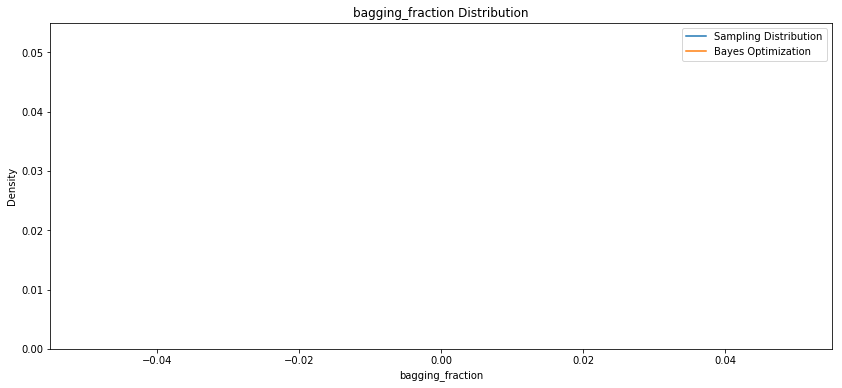

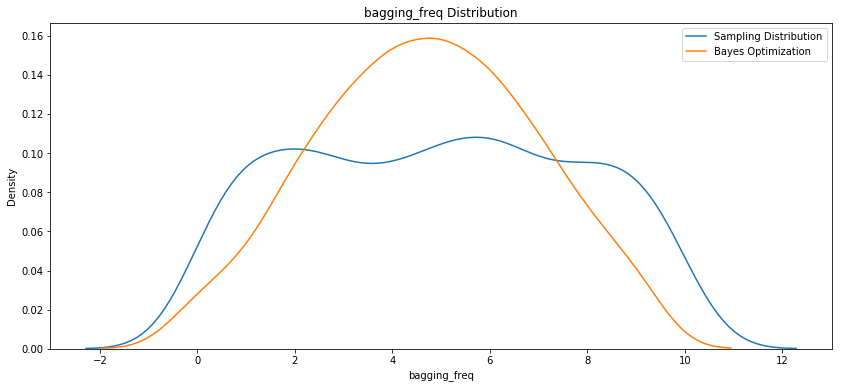

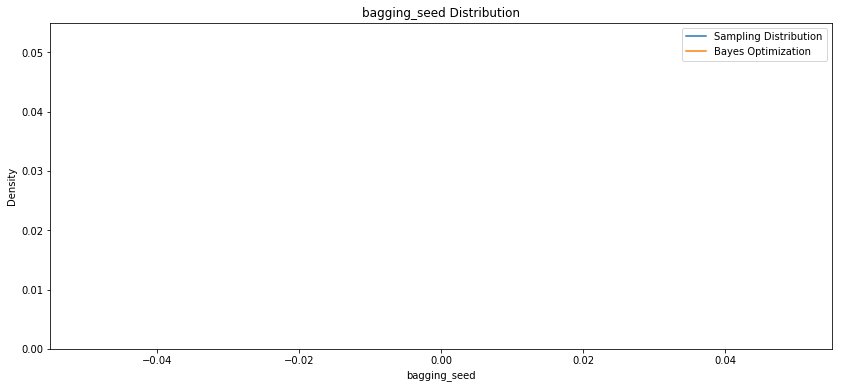

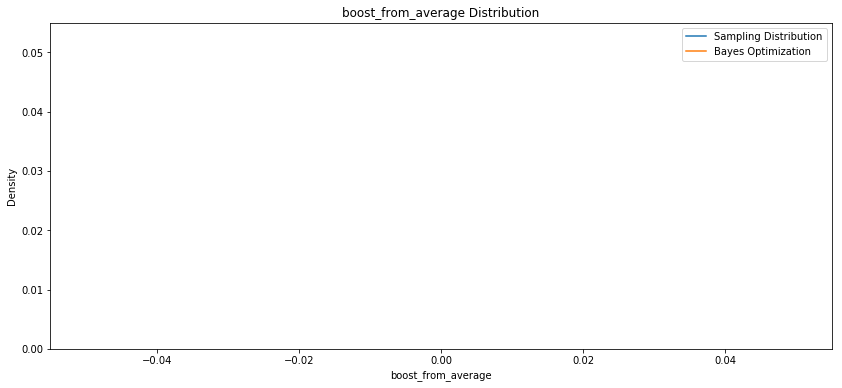

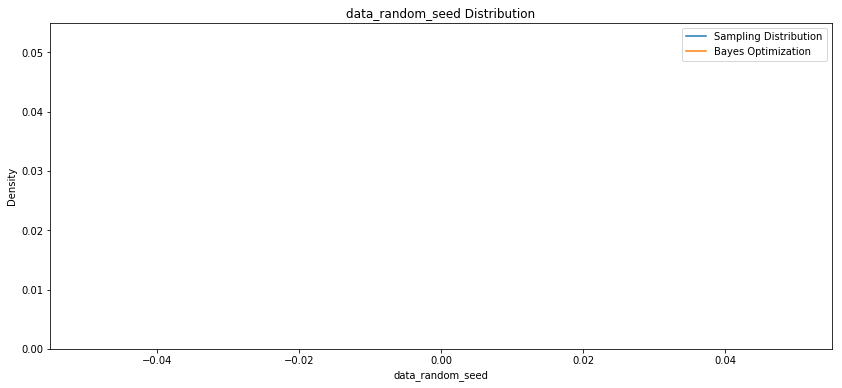

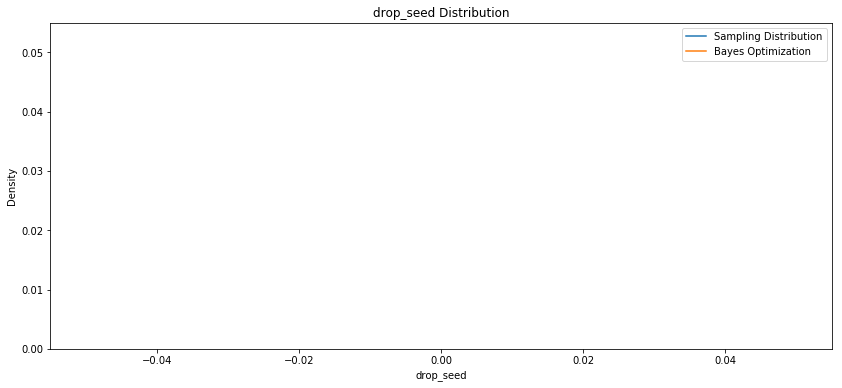

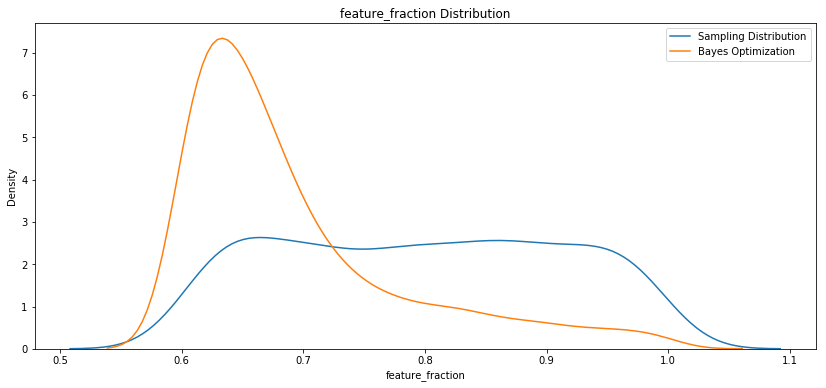

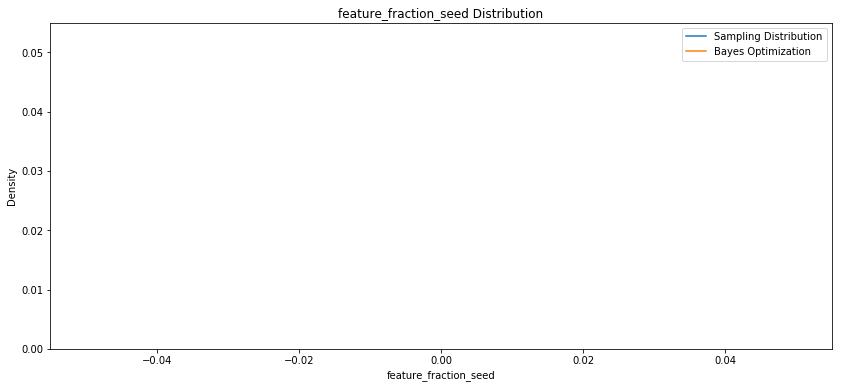

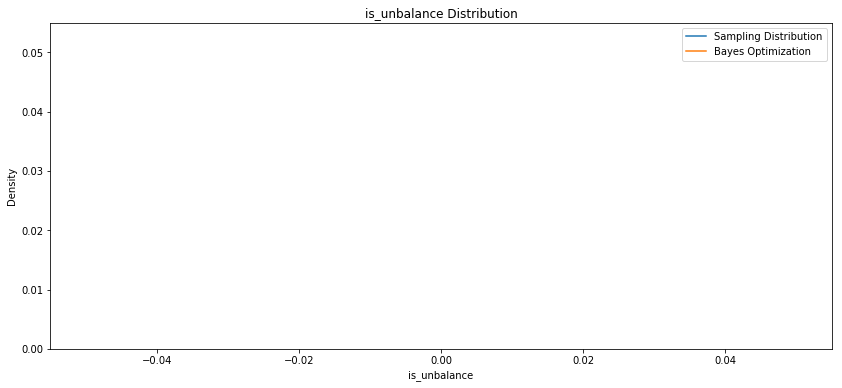

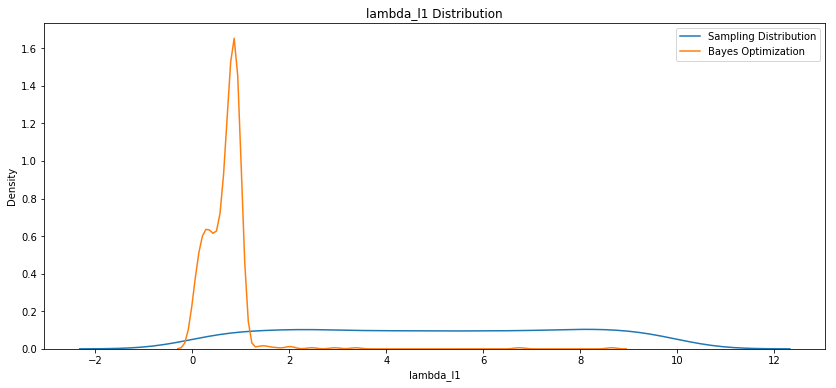

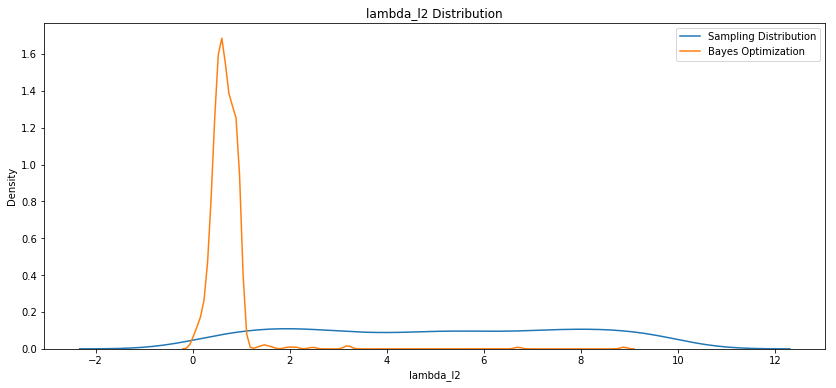

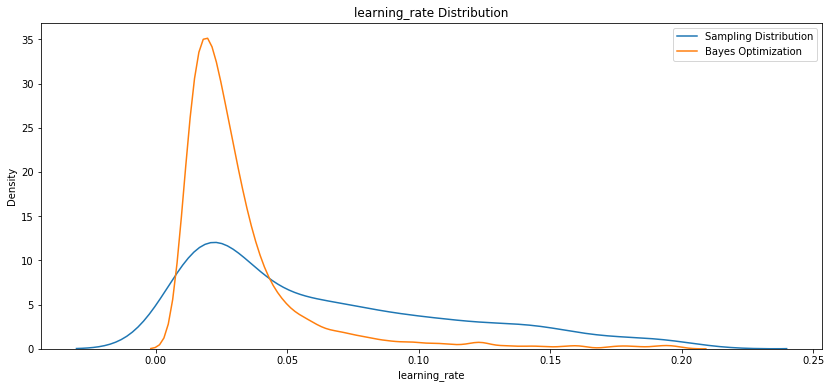

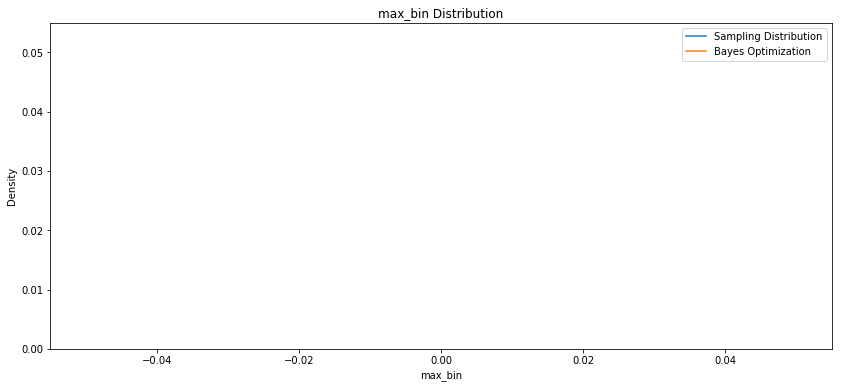

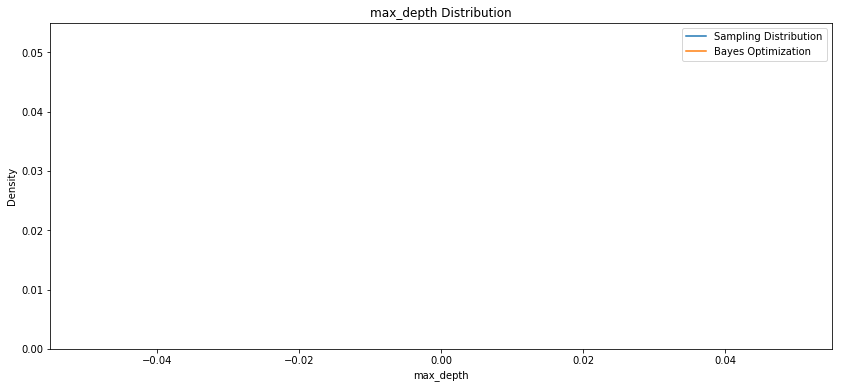

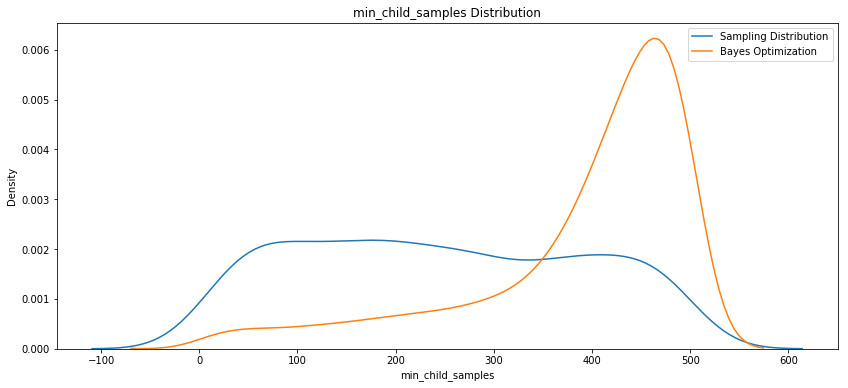

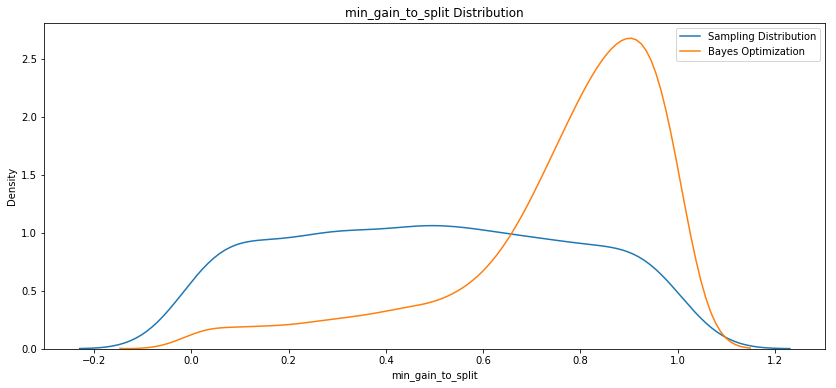

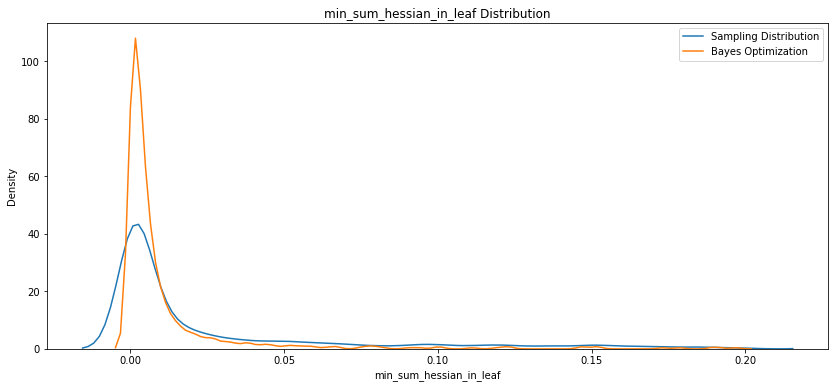

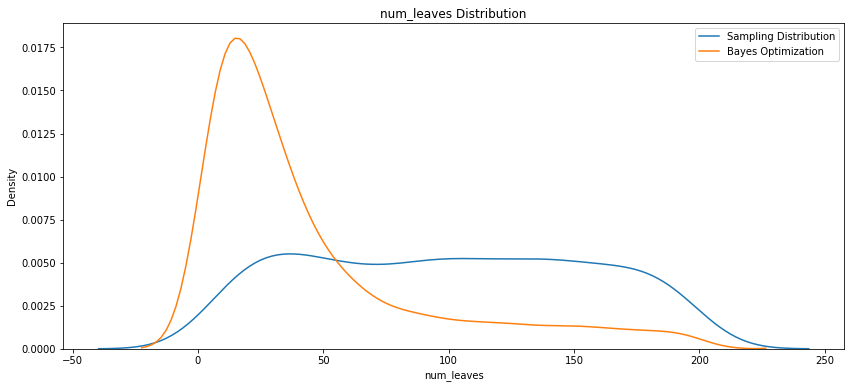

ValueError: could not convert string to float: 'binary'

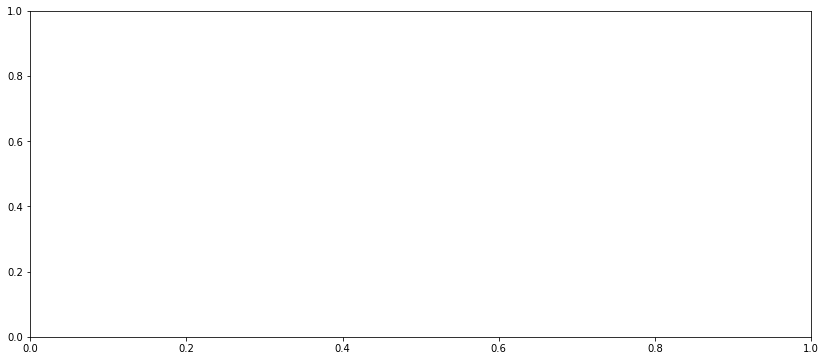

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import hp
from hyperopt.pyll.stochastic import sample
# Iterate through each hyperparameter
for i, hyper in enumerate(bayes_params.columns):
    if hyper not in ['class_weight', 'boosting_type', 'iteration', 'subsample', 'metric', 'verbose']:
        plt.figure(figsize = (14, 6))
        # Plot the random search distribution and the bayes search distribution
        if hyper != 'loss':
            sns.kdeplot([sample(space[hyper]) for _ in range(1000)], label = 'Sampling Distribution')
#         sns.kdeplot(random_params[hyper], label = 'Random Search')
        sns.kdeplot(bayes_params[hyper], label = 'Bayes Optimization')
        plt.legend(loc = 1)
        plt.title('{} Distribution'.format(hyper))
        plt.xlabel('{}'.format(hyper)); plt.ylabel('Density');
        plt.show();